# **STEP 1: LIBRARY AND FILE SETUP**
First we will import all the necessary libraries for loading files, creating models and generating graphic visualizations of the data as well as predictions for determining patterns in the Wine quality data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

2024-05-03 23:54:44.999825: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 23:54:44.999972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 23:54:45.184640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **STEP 2: VERIFY THAT DATA IS PROPERLY LOADED**
This code loads the training and blind test datasets to ensure the data is loaded properly.

In [2]:

# Loading the training data
train_data_path = '/kaggle/input/wine-quality-final-dataset/train.csv'
train_data = pd.read_csv(train_data_path)

# Loading the blinded test data
test_blinded_data_path = '/kaggle/input/wine-quality-final-dataset/test_blinded.csv'
test_blinded_data = pd.read_csv(test_blinded_data_path)

# Display first few rows of the dataset to ensure they are loaded properly.
train_head = train_data.head()
test_blinded_head = test_blinded_data.head()
IDs = test_blinded_data.iloc[:, 0]
test_blinded_data = test_blinded_data.drop('ID', axis=1)
(train_head, test_blinded_head)

(   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
 0            6.5              0.43         0.28           12.00      0.056   
 1            6.3              0.26         0.21            4.00      0.030   
 2            6.4              0.16         0.32            8.75      0.038   
 3            7.0              0.78         0.08            2.00      0.093   
 4            7.0              0.22         0.33            2.10      0.052   
 
    free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
 0                 23.0                 174.0  0.99860  3.31       0.55   
 1                 24.0                 125.0  0.99150  3.06       0.34   
 2                 38.0                 118.0  0.99449  3.19       0.41   
 3                 10.0                  19.0  0.99560  3.40       0.47   
 4                 15.0                  76.0  0.99300  3.20       0.41   
 
    alcohol  quality  
 0      9.3        5  
 1     10.7        6  
 2 

# **STEP 3: PREPROCESSING**
Next, we will conduct preprocessing by reading the datasets to ensure there are no missing values that can skew the results.

In [3]:
#Data Preprocessing: Making sure there are no missing values that can skew the results.
missing_values_train = train_data.isnull().sum()
missing_values_test = test_blinded_data.isnull().sum()
(missing_values_train, missing_values_test)

#Let us analyze then the data information.
print("Training Data Info")
train_data.info()
print("Test Data Info")
test_blinded_data.info()



Training Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4750 non-null   float64
 1   volatile.acidity      4750 non-null   float64
 2   citric.acid           4750 non-null   float64
 3   residual.sugar        4750 non-null   float64
 4   chlorides             4750 non-null   float64
 5   free.sulfur.dioxide   4750 non-null   float64
 6   total.sulfur.dioxide  4750 non-null   float64
 7   density               4750 non-null   float64
 8   pH                    4750 non-null   float64
 9   sulphates             4750 non-null   float64
 10  alcohol               4750 non-null   float64
 11  quality               4750 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 445.4 KB
Test Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (tota

# **STEP 4: STATISTICAL INFORMATION**
Following successful preprocessing, we then generate histograms of each attribute and generate a correlation matrix to see the relationships between each attribute.

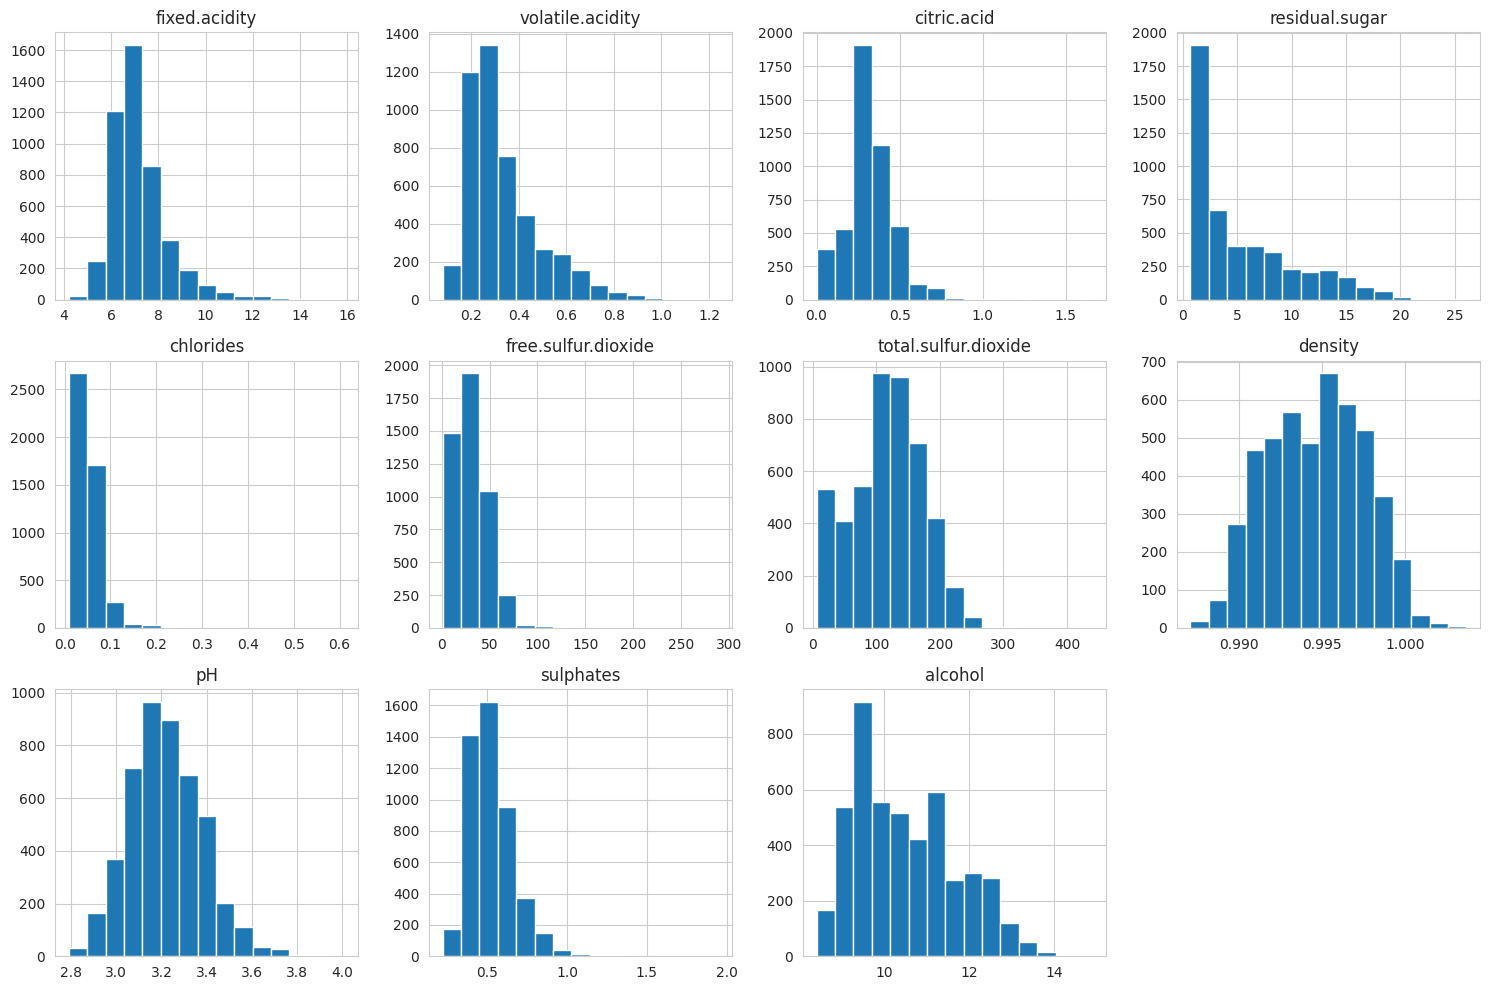

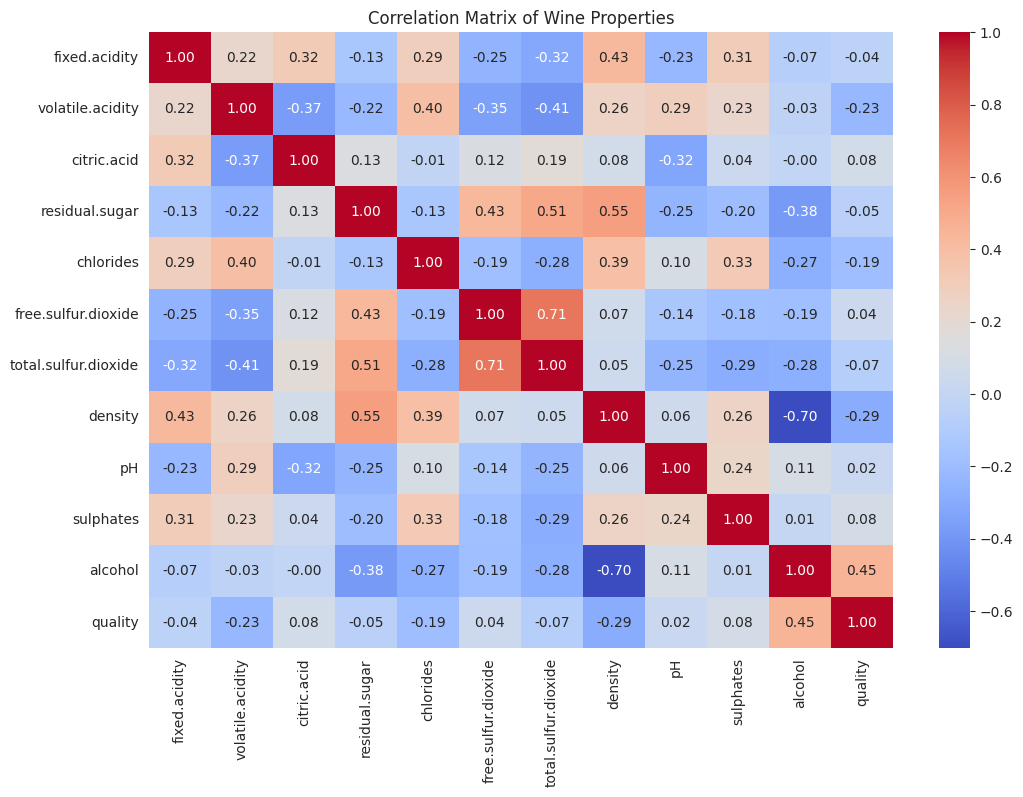

In [4]:
#Get the descriptive stats.
descriptive_stats = train_data.describe()


missing_values = train_data.isnull().sum()

(descriptive_stats, missing_values)


sns.set_style("whitegrid")


features = train_data.columns[:-1]
train_data[features].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Wine Properties')
plt.show()


# **STEP 5: CHOOSING THE MODEL**
Then, we choose the model for making our predictions.

For our model, we will use a random decision tree and specifically a random forest decision tree. We will also apply the following parameters for mitigating overfitting:

max_depth=8
min_samples_leaf=5
min_samples_split=2
max_features=4

In [5]:
#Take away the quality so that we can evaluate performance between predictions and given wine quality values.
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']
#Split dataset by taking part of the dataset and using it for testing the model. We choose to use 30% for testing.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

#Generate model. We set a max depth and minimum amount of samples for leaf nodes. This further reduces overfitting.
model = RandomForestRegressor(n_estimators=2000,random_state=42,max_features=2)
#Ensure proper splitting of data.
print("x Train shape: ",X_train.shape)
print("x Val shape: ",X_val.shape)
print("y train shape: ",y_train.shape)
print("y val shape: ",y_val.shape)
print("test blinded: ", test_blinded_data.shape)
# Fit the model
model.fit(X_train, y_train)

# Make predictions for both training and validation. The predictions for the validation set will be used for the submission.
train_preds = model.predict(X_train)
val_preds = model.predict(test_blinded_data)

# MSE training and validation scores.
print('Model 1')
print('Training MSE : ', mean_squared_error(y_train, train_preds))
# Cross-validation.
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive MSE values
mse_scores = -scores
# More comprehensive results obtained from the k-fold cross validation function.
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())

x Train shape:  (4037, 11)
x Val shape:  (713, 11)
y train shape:  (4037,)
y val shape:  (713,)
test blinded:  (3109, 11)
Model 1
Training MSE :  0.03327472702501857
MSE scores for each fold: [0.22112217 0.30412225 0.26695389 0.31039208 0.33939777]
Average MSE: 0.28839763093729676


# **STEP 6: FITTING THE MODEL AND GENERATING PREDICTIONS**
After we cross-validate the data and obtain the Mean Squared Error (MSE), we then fit the model. The results are generated in a csv file.

In [6]:
#Get table of most important variables.
results = permutation_importance(model, X_val, y_val, scoring='neg_mean_squared_error')
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

#Display Features and their importance.
print(feature_importance)
#We flatten predictions to ensure that they are returned in a 1-d array with all the predicted values.
predictions = val_preds.flatten()
# Evaluate the model (e.g., mean squared error)
predictions_df = pd.DataFrame(predictions, columns=['predicted_quality'])
predictions_df['ID'] = IDs
predictions_df = predictions_df[['ID', 'predicted_quality']]
#Generate results in a csv for evaluation.
predictions_df.to_csv('submission.csv', index=False)

                 Feature  Importance
10               alcohol    0.238524
5    free.sulfur.dioxide    0.109569
1       volatile.acidity    0.099126
7                density    0.091834
4              chlorides    0.086030
6   total.sulfur.dioxide    0.075530
9              sulphates    0.072052
2            citric.acid    0.069125
8                     pH    0.058948
3         residual.sugar    0.058057
0          fixed.acidity    0.040935


# **REPORT**
## **Abstract**
Wines are a popular choice for many people and a staple drink in restaurants worldwide. Due to this, there is a great demand for high quality wines and wine sellers/makers need to be able to This study explores the application of machine learning algorithms to predict the quality of wines based on their physiochemical properties. Using a dataset consisting of 3109 wine samples, we employed a random forest regression model due to its robustness in handling both linear and non-linear relationships and its efficacy in generalizing from the training data. The model was trained on an 85/15 split of the data, which was preprocessed to remove null values. Feature importance analysis revealed that alcohol content, volatile acidity, and free sulfur dioxide are the most significant predictors of wine quality, whereas fixed acidity, pH, and residual sugar had the least impact. The model achieved a training mean squared error (MSE) of 0.03 and a validation MSE of 0.25, indicating a moderate overfitting which suggests the model's good predictive ability but also highlights an area for further optimization. This analysis provides valuable insights for wine sellers on which features to emphasize or mitigate in their quality enhancement strategies.
## **Introduction**
Wines are a popular choice of drink for many people and have been a staple of restaurants, social gatherings, and even quiet evenings at home. Known for its variety and complexity, wine pairs beautifully with food, enhances flavors, and often plays a key role in culinary experiences. From reds to whites, rosés to sparkling, each type offers a unique taste and aroma that can suit different moods, meals, and preferences. Each wine has physiochemical properties which make up the properties of wine such as alcohol content, density, fixed acidity etc. The degree to which these properties affect the quality of wines is important information for wine sellers to know. Knowing what specific features of wine affect the quality the most or least can help wine sellers understand which features they need to utilize in order to emphasize positively influential characteristics and mitigate negatively impactful characteristics. Machine learning techniques can be levied to draw conclusions about wine quality by using given data with quantitative values for each feature. In this report, I will discuss the machine learning algorithm used for the wine quality dataset, justify its use, and then discuss the results of the feature importance, showing which qualities are most relevant to adjusting wine quality.

## **Methodology**
In this project, we are given a Wine quality dataset that consists of two files: the training.csv file and test.csv file. These files are used to train the regression model so that it learns to determine wine quality and test its capabilities with unseen data. Both data files include 3109 entries, each representing a different instance of wines. The regression model is supervised, meaning that the train csv specifically has a quality column that gives the quality for each row. The development process is thus as follows: First, we read the csv files to store the data in variables. Before training, we also preprocess the data by searching for null values in both the training and test sets to prevent skewing of results. Then, we split the dataset into 85% training and 15% testing. Next, we need to decide on a regression model to train and generate predictions. There are a number of different techniques that can be used for this purpose. In our project, however, we opt to use a random forest algorithm. We use a random forest algorithm due to its flexibility because it can handle both linear and non-linear relationships between attributes of wine. Because we are dealing with continuous values, its multiple tree generation method means that it can understand more complex correlations between chemicals and wine quality. Also, predictions for each generated tree reduce the possibility of overfitting, making Random Forest trees a more suitable candidate for generalizing wine quality. Therefore, we write a random forest regression model for our project to generate our predictions. 
## **Results**

### **Feature Importance results**
For feature importance, the top 3 most important factors are:

1.   alcohol (0.24)
2.   volatile.acidity (0.10)
3.   free.sulfur.dioxide (0.10)


The top 3 least important factors are:


1.   fixed.acidity (0.04)
2.   residual sugar (0.06)
3.   pH (0.06)

### **MSE and Cross Validation results**
Training MSE :  0.03
Validation scores: 0.25
MSE scores for each fold: [0.22112217 0.30412225 0.26695389 0.31039208 0.33939777]
Average MSE: 0.29
## **Conclusion**
In this report, we developed and trained a random forest regression model to predict wine quality from physiochemical properties and their values. The model has demonstrated promising results, reflecting the capability to effectively capture and interpret the complex relationships within the data. Our analysis identified alcohol content, volatile acidity, and free sulfur dioxide as the most influential factors affecting wine quality. It provides a clear direction for winemakers and sellers on which characteristics to focus their quality improvement efforts. While the model exhibited some degree of overfitting, as indicated by the disparity between the training and validation MSE, the relatively close values suggest that it can generalize reasonably well to new data.